In [1]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del var
del all

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time, datetime, sys, os
from module_opt import *

In [3]:
# Parameter setting
g = 9.81 # Gravity acceleration [m*s2]
c = 343 # Sound speed [m/s]
e = .8 # Oswald efficiency factor
C_D0 = .0083 # Zero lift drage coefficient
AR = 10 # Aspect ratio of the wing
S = 100 # Platform area [m2]
W_e = 162400 # Empty weight of the aircraft [kg]
W_fuel = 146571 # Initial fuel weigh of the aricraft [kg]
A_t = 1.3295 # Surface area of the turbine [m2]
FAR = .1 # Fuel ratio over the air

fuel_remain = .75 # Fuel remaining level after flight

In [4]:
### Design variables
# # One value
# h = 10000 # Altitude [m]
# V = 150 # Cruise Velocity [m/s]

# Ranged values
resolution = .01
step_V = 50*resolution
step_h = 5000*resolution
V_limit = 400 # [m/s]
h_limit = 25000 # [m]
grid = np.meshgrid(np.arange(1e-5, V_limit+step_V, step_V), np.arange(1e-5, h_limit+step_h, step_h))
grid

V = grid[0]
h = grid[1]

In [5]:
# Intermediate variables
rho_air = 1.2*(1 - .0065*h/288)**5.26 # Air density [kg/m3]
W_f = W_e + (W_fuel*fuel_remain) # Weight of the aircraft after flight [kg]
L = W_f*g # Lift force [N]
C_L = 2*L/(rho_air*(V**2)*S) # Lift Coefficient
C_WD = 10*(np.arctan(10*((V/(.7*c))**2 - 1)) + .5*np.pi) # Wave drag coefficient
# C_WD = 0.06*np.maximum(0.0, (V/c)-0.72)**2
C_D = C_D0 + (C_L**2)/(np.pi*e*AR) + C_WD # Drag coefficient
D = .5*C_D*rho_air*(V**2)*S # Drag force [N]
T = D # Thrust force = Drag force [N]
W_i = W_e + W_fuel # Initial weight of the aircraft [kg]
m_air = V*A_t*rho_air # Mass rate of air [kg/s]
m_f = m_air*FAR # Mass rate of fuel [kg/s]
c_t = m_f/T + 1e-5 # Specific fuel consumption [kg/(s*N)]

In [6]:
Range = (V/c_t)*(C_L/C_D)*np.log(W_i/W_f) # Maximum range of aircraft from Breguet Eqn [m]
Range = np.round(Range*.001)

Text(0.5, 1.0, 'Maximum range of aircraft vs Velocity, Altitude')

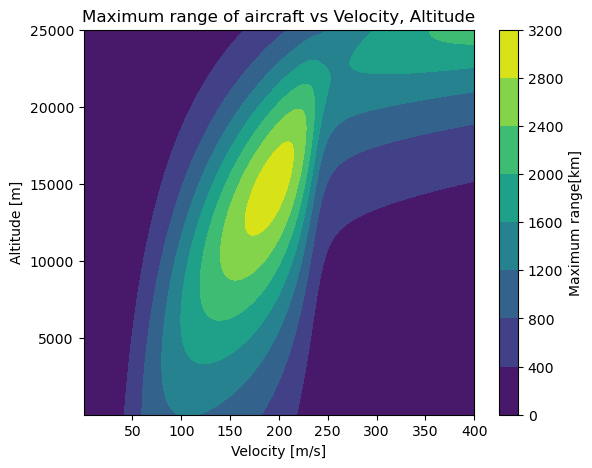

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6.3, 5))
contourf = ax.contourf(grid[0], grid[1], Range)
colorbar = fig.colorbar(contourf, ax=ax)
colorbar.set_label('Maximum range[km]')
ax.set_xlabel('Velocity [m/s]')
ax.set_ylabel('Altitude [m]')
ax.set_title('Maximum range of aircraft vs Velocity, Altitude')

In [8]:
def range_breguet(x):
    V = x[0]
    h = x[1]

    # Parameter setting
    g = 9.81 # Gravity acceleration [m*s2]
    c = 343 # Sound speed [m/s]
    e = .8 # Oswald efficiency factor
    C_D0 = .0083 # Zero lift drage coefficient
    AR = 10 # Aspect ratio of the wing
    S = 100 # Platform area [m2]
    W_e = 162400 # Empty weight of the aircraft [kg]
    W_fuel = 146571 # Initial fuel weigh of the aricraft [kg]
    A_t = 1.3295 # Surface area of the turbine [m2]
    FAR = .1 # Fuel ratio over the air

    fuel_remain = .75 # Fuel remaining level after flight

    # Intermediate variables
    rho_air = 1.2*(1 - .0065*h/288)**5.26 # Air density [kg/m3]
    W_f = W_e + (W_fuel*fuel_remain) # Weight of the aircraft after flight [kg]
    L = W_f*g # Lift force [N]
    C_L = 2*L/(rho_air*(V**2)*S) # Lift Coefficient
    C_WD = 10*(np.arctan(10*((V/(.7*c))**2 - 1)) + .5*np.pi) # Wave drag coefficient
    # C_WD = 0.06*np.maximum(0.0, (V/c)-0.72)**2
    C_D = C_D0 + (C_L**2)/(np.pi*e*AR) + C_WD # Drag coefficient
    D = .5*C_D*rho_air*(V**2)*S # Drag force [N]
    T = D # Thrust force = Drag force [N]
    W_i = W_e + W_fuel # Initial weight of the aircraft [kg]
    m_air = V*A_t*rho_air # Mass rate of air [kg/s]
    m_f = m_air*FAR # Mass rate of fuel [kg/s]
    c_t = m_f/T + 1e-5 # Specific fuel consumption [kg/(s*N)]

    # Range
    result = (V/c_t)*(C_L/C_D)*np.log(W_i/W_f) # Maximum range of aircraft from Breguet Eqn [m]
    # Range = np.round(Range*.001)

    return result

In [ ]:
func = lambda x : -1 * range_breguet(x)
# x_cur = [100, 5000]
x_cur = [50, 5000]
# stp_descent(func=func, x_cur=x_cur, tol=1e-2)
# cg_hs(func=func, x_cur=x_cur, tol=1e-2)
# cg_fr(func=func, x_cur=x_cur, tol=1e-2)
# newton(func=func, x_cur=x_cur, tol=1e-2)
quasi_newton_bfgs(func=func, x_cur=x_cur, tol=1e-2)

x0 : [ 100 5000]
norm of grad at x0 : 15806.78819465634 --> x0 is not optimum point. Optimization begins ...
p_0 = [8372551.13627982  -55163.88398592]
alpha_0_17 = 7.62939453125e-06

x_1 = [ 163.87749585 4999.57913297] / |grad(x_1)| = 10137.813206865214
p_1 = [-2731317.18380359   -24015.63133471]
alpha_1_16 = 1.52587890625e-05

x_2 = [ 122.20090308 4999.21268351] / |grad(x_2)| = 4539.216620651259
p_2 = [2088943.05079124  -13341.19291007]
alpha_2_17 = 7.62939453125e-06

x_3 = [ 138.13827377 4999.11089829] / |grad(x_3)| = 2059.982208432865
p_3 = [-756017.97012385    4692.2933746 ]
alpha_3_17 = 7.62939453125e-06

x_4 = [ 132.3703144  4999.14669765] / |grad(x_4)| = 217.06427640788544
p_4 = [65678.26530302  -129.95755459]
alpha_4_17 = 7.62939453125e-06

x_5 = [ 132.8713998  4999.14570615] / |grad(x_5)| = 148.91439502584194
p_5 = [-14879.91960279   -187.72438844]
alpha_5_17 = 7.62939453125e-06

x_6 = [ 132.75787502 4999.14427392] / |grad(x_6)| = 144.28126563778903
p_6 = [3208.10164458   74.0

KeyboardInterrupt: 

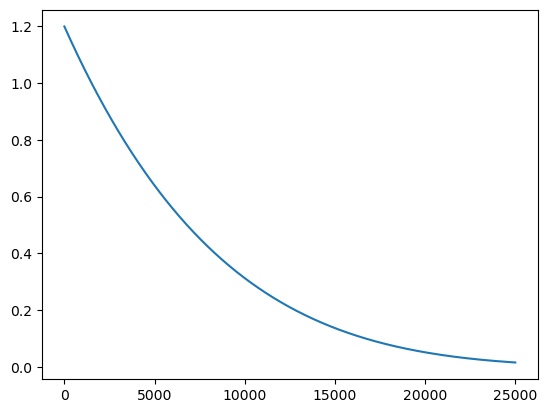

In [ ]:
test_h = np.arange(0, 25000)
test_rho = 1.2*(1 - 0.0065*test_h/288)**5.26
plt.plot(test_h, test_rho)

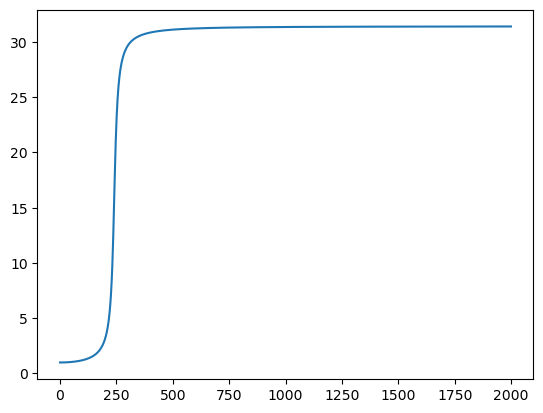

In [253]:
test_V = np.arange(0, 2000)
test_CWD = 10*(np.arctan(10*((test_V/(.7*c))**2 - 1)) + .5*np.pi)
plt.plot(test_V, test_CWD)